In [2]:
import csv
import pandas as pd
import string
import re # for regular expression
import nltk 
from nltk.tokenize import word_tokenize  # for tokenization purpose.
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
# read csv file and save it in a data frame
data_df=pd.read_excel("tweets.xlsx") 
#remove NAN values 
data_df=data_df[pd.notnull(data_df.Contents)]

In [4]:
# how much data do I have?
len(data_df)

4999

In [5]:
# How about if I want to see part of the data?
data_df[1000:1200]

,Region,Col1,Contents,Date
1000,Unayzah,قطعة الماس,@shubaili_MOHD الايسكريم شتاءاً يؤكل ليلاً اذا نامو المزز 🤭\nخوفا على صحتهم 😁,2019-02-22 11:00:56
1001,Makkah Al Mukarrama,Abdulrhman,@xiFaLCoNx مساء الجلد ومساء المتعة 💜😍,2019-02-22 11:00:55
1002,Yanbu,سارا بنت عبدالله ⚖️.,@88_abdullah_ راعي مشاعري النصراويه,2019-02-22 11:00:55
1003,Al Kharj,د.ناصر بن حماد الحماد الجعيدي,@SpedPSAUcl @Ibrahim_almotib @SpEd_psau @cedu111 @psau_clubs بارك الله فيها من جهود,2019-02-22 11:00:53
1004,Riyadh,د.خالد العنقري,@AljawazatKSA سؤال الجوازات عندي عامله هربت وبلغت عن طريق ابشر وعن طريق الشرطة حتى الان لم يصلني اي معلومة والان تم… https://t.co/l65Xe3gYe9,2019-02-22 11:00:53
1005,Makkah Al Mukarrama,Shahad 🌈,😂😂😂 https://t.co/DXINvzguS0,2019-02-22 11:00:51
1006,Riyadh,‏﮼﮼عائشـــهَ,ليلة جميلة يُطل فيها كبير الرياض وثلاث نقاط من نصيبه أن شاء الله ،، جمهور الشرقيه الهمة بالحضور والدعم .#القادسيه_الشباب,2019-02-22 11:00:51
1007,Riyadh,Ғαιƨαℓ,عطر الله جمعتكم\n#رابطة_عشاق_العطور \n #يوم_الجمعه https://t.co/PZ5TQnoKSq,2019-02-22 11:00:51
1008,Dammam,فهد ع آل بن علي,@xZpVHlLOx6yUG9v اللهم امين والله يجزاك خير ولا يريكم مكروه,2019-02-22 11:00:49
1009,Makkah Al Mukarrama,Batool saati,😂😂😂😂💔\nطيب طفش ياخي 🚶🏻‍♀️ https://t.co/96Xm9olfwo,2019-02-22 11:00:48


In [6]:
Joy_df=pd.read_csv("Joy.csv")

In [7]:
Joy_list=Joy_df["word"].values.tolist()

In [8]:
# apply the list to the data

In [9]:
def Joy_sentiment(tweet):
    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in Joy_list:
        if word in tweet:
            count+=1
    
    return count

In [10]:
#apply the method to the data
data_df["Joy_count"] = data_df['Contents'].apply(lambda x: Joy_sentiment(x))


In [11]:
# read negative words list
Peace_df=pd.read_csv("Peace.csv")

In [12]:
Peace_list=Peace_df["word"].values.tolist()

In [13]:
def Peace_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in Peace_list:
        if word in tweet:
            count+=1
               
    return count

In [14]:
data_df["Peace_count"] = data_df['Contents'].apply(lambda x: Peace_sentiment(x))

In [15]:
data_df.head(100)

,Region,Col1,Contents,Date,Joy_count,Peace_count
0,NaN,اهل,"""\n\nاللهم كُن جبري حين أُكسر،كُن يقينِي حين تعلم أني أُظلم،كُن نوري وهُداي حين أسقط وأتعَثر..!\n\n""\n... يارب ...",2019-02-22 11:12:59,1,2
1,Hafr Al Batin,منصور الفهيد,بيتين شعر تقليدية مباشرة جداً على بحر المسحوب والشطر الأول ثقييييل إذا مو مكسور بعد من شاعر يفترض أنه جزل !\nمش هنا… https://t.co/rC0DcTJKNt,2019-02-22 11:12:59,0,0
2,Riyadh,أبو سلمى,@Elzmalkwya1911 https://t.co/96ub45497k,2019-02-22 11:12:58,0,0
3,Hail,علي محمد الضبعان,تشرفت عصر أمس بحضور زيارة صاحب السمو الملكي الأمير فيصل بن فهد بن مقرن نائب أمير منطقة #حائل لمركز الهجن والهجانة ب… https://t.co/vgDpW6vsDv,2019-02-22 11:12:58,0,0
4,Riyadh,خالد الشمري,@Abdulla12683467 سبحان الله روعه,2019-02-22 11:12:57,0,0
5,Jeddah,Mahmoud Bashawri,"I'm at Piatto in Jeddah, Makkah Province https://t.co/Urg0TVntKZ",2019-02-22 11:12:57,0,0
6,Al Madinah Al Munawwarah,العنود .,احس كلو يهون الا الاستهزاء و الإهانة,2019-02-22 11:12:57,0,0
7,Asir,#فريق_طقس_القنفذه,يحدث الان 🔴\n\nرشوش خفيفه الان على بني ذيب شرق حلي \n\nعضو الفريق/ يحيى الذيبي https://t.co/yTTrE56jVi,2019-02-22 11:12:55,0,0
8,Riyadh,انس العبيد🕊,#يوم_الجمعه https://t.co/OF5mSviyk1,2019-02-22 11:12:55,0,0
9,Jeddah,محمد بن عودهـ,@shroq240 اللهم امين,2019-02-22 11:12:54,0,0


# Filter tweets 

In [16]:
# look at only the valuable tweets 
data_df[(data_df != 0).all(1)].head()

,Region,Col1,Contents,Date,Joy_count,Peace_count
0,NaN,اهل,"""\n\nاللهم كُن جبري حين أُكسر،كُن يقينِي حين تعلم أني أُظلم،كُن نوري وهُداي حين أسقط وأتعَثر..!\n\n""\n... يارب ...",2019-02-22 11:12:59,1,2
10,Jeddah,مشاري بن عوض الدوسي,الله يوفقك يا اختي ويتمم لك على خير يارب ❤️😍 الف مبروك,2019-02-22 11:12:53,1,1
42,Al Khobar,حياة,ربي في يوم الجمعة لك عبادٌ\nينتظرون فرجاً فبشرهم و عبادٌ\nيسألون شفاءً فعافهم \nوعبادٌ يرجون رحمتك فأرحمهم\nوأمواتٌ ينت… https://t.co/waOdqD1TTR,2019-02-22 11:12:18,1,2
194,Jeddah,AyedAlOtaibi,ربي في يوم الجمعة لك عبادٌ\nينتظرون فرجاً فبشرهم و عبادٌ\nيسألون شفاءً فعافهم \nوعبادٌ يرجون رحمتك فأرحمهم\nوأمواتٌ ينت… https://t.co/i3gC76QoyN,2019-02-22 11:10:09,1,2
484,Haql,فايز العوني,#يوم_الجمعة \n\nاللهُم صلِّ وسلم على نبينا مُحمد ؛ من كانت بعثتهُ عافية لقلوبنا ، وشرحًا لصدورنا ، وجبرًا لكسرنا ، و… https://t.co/dDEeJT1Dew,2019-02-22 11:06:43,1,1


# Clean the text

In [17]:
# 1- remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [18]:
# 2- Normalization 
def normalize_arabic(text):
    
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ؤ", "و", text)

    return text

In [19]:
# 3- Remove Repeating characters 
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [20]:
# 4- Problem with the word الحمدلله ، اللهم in removing repeating characters
def keepSomeWords(text):
    text= re.sub ("الحمدله", "الحمدلله", text)
    text= re.sub ("اله", "الله", text) # note that اللهم is a subset from the word الله so we didn't include it 
  
    return text

In [21]:
# 5- Remove emojis 
def remove_emoji(text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r' ', text)

In [22]:
# 6- Remove the new line \n 
def remove_newLine(text):
    text= re.sub ("\n"," ", text)
    return text

In [23]:
# 7- Tokenization 
def tokinization (text):
    return (word_tokenize(text))

In [24]:
# 8- Stop Words Removal
def remove_stopWord(text):
    text = re.sub (" في","", text)
    text = re.sub (" من","", text)
    text = re.sub (" على","", text)
    text = re.sub (" الى","", text)
    text = re.sub (" عن","", text)
    text = re.sub (" او","", text)
    text = re.sub (" متى","", text)
    text = re.sub (" ان ","", text)
    text = re.sub ("الا","", text)
    text = re.sub (" نعم","", text)
    text = re.sub ("اي","", text)
    text = re.sub (" ايه","", text)
    text = re.sub (" ثم","", text)
    text = re.sub (" حتى","", text)
    text = re.sub ("انو","", text)
    text = re.sub (" كي","", text)
    text = re.sub (" لو","", text)
    text = re.sub (" لن","", text)
    text = re.sub (" ليه","", text)
    text = re.sub (" ليس","", text)
    text = re.sub (" ليش","", text)
    text = re.sub (" لماذا","", text)
    text = re.sub (" لا","", text)
    text = re.sub (" هذي","", text)
    text = re.sub (" لك","", text)
    text = re.sub ("وينكم","", text)
    text = re.sub ("حين","", text)
     
    return text

In [25]:
# 9- Remove Username 
def remove_username (text):
    return re.sub('@[^\s]+', ' ', text)

In [26]:
# 10- remove links 
def remove_links (text):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

In [27]:
# 11- convertHashtag
def convert_hashtag(text):
    return re.sub(r'#([^\s]+)', r'\1', text)

In [28]:
# 12- RemoveNum
def remove_num (text):
    return ''.join(i for i in text if not i.isdigit())

In [29]:
#13 - Remove english letters
def remove_English (text):
    text= re.sub(r'[a-z]+'," ", text)
    text= re.sub(r'[A-Z]+'," ", text)
    return text



In [30]:
#14 - Problem with symbol _ it means in twitter as space to separate the words 
def convert_to_space (text):
    return re.sub("_", " ", text)

In [31]:
#15 - Remove Arabic diacritics example (ً  ، ٌ )
def remove_Arabicdiacritics(text):
    text = re.sub ("ََ","", text)
    text = re.sub ("َ","",text)
    text = re.sub ("ً","", text)
    text = re.sub ("ِ","", text)
    text = re.sub ("ٍ","", text)
    text = re.sub ("ُ","", text)
    text = re.sub ("ْ","", text)
    text = re.sub ("ّ","",text)
    text = re.sub ("ٌ","",text)
    return text

In [32]:
#start processing the tweets  
def processPost(tweet):
                                 #================================================
               
                                 #--   Proceess all above methods all at once   --
    
                                 #================================================
        
    #Replace @username with empty string
    tweet = remove_username(tweet)
    
    #Convert www.* or https?://* to " "
    tweet = remove_links (tweet)
    
    #Replace #word with word
    tweet = convert_hashtag(tweet)
    
    # Replace _ with space 
    tweet = convert_to_space(tweet)
    
     # Stop word removal 
    tweet= remove_stopWord(tweet)
    
    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    #check if the word in the dictionary list (it have two letters as part of the word)
    tweet= normalize_arabic(tweet)
    
    #remove numbers
    tweet = remove_num(tweet)
    
    #remove english letters
    tweet= remove_English(tweet)
    
    # remove repeating characters
    tweet=remove_repeating_char(tweet)
    # Remove Emojis 
    tweet= remove_emoji(tweet)
    
    # keep some words not affected due to removing the repeated characters 
    tweet= keepSomeWords(tweet)
    
    # remove the symbole of the new line 
    tweet= remove_newLine(tweet)
    
    tweet= remove_Arabicdiacritics(tweet)
    
    # tokinization 
    #tweet = tokinization(tweet)
    
                     #================================================
               
                     #--           The End of Cleaning              --
    
                     #================================================
    
    return tweet


In [33]:
data_df["clean text"] = data_df['Contents'].apply(lambda x: processPost(x))

In [34]:
# look at only the valuable tweets 
data_df[(data_df != 0).all(1)]


,Region,Col1,Contents,Date,Joy_count,Peace_count,clean text
0,NaN,اهل,"""\n\nاللهم كُن جبري حين أُكسر،كُن يقينِي حين تعلم أني أُظلم،كُن نوري وهُداي حين أسقط وأتعَثر..!\n\n""\n... يارب ...",2019-02-22 11:12:59,1,2,اللهم كن جبري اكسركن يقيني تعلم اني اظلمكن نوري وهد اسقط واتعثر يارب
10,Jeddah,مشاري بن عوض الدوسي,الله يوفقك يا اختي ويتمم لك على خير يارب ❤️😍 الف مبروك,2019-02-22 11:12:53,1,1,الله يوفقك يا اختي ويتم خير يارب الف مبروك
42,Al Khobar,حياة,ربي في يوم الجمعة لك عبادٌ\nينتظرون فرجاً فبشرهم و عبادٌ\nيسألون شفاءً فعافهم \nوعبادٌ يرجون رحمتك فأرحمهم\nوأمواتٌ ينت… https://t.co/waOdqD1TTR,2019-02-22 11:12:18,1,2,ربي يوم الجمعه عباد ينتظرون فرجا فبشرهم و عباد يسالون شفاء فعافهم وعباد يرجون رحمتك فارحمهم واموات ينت
194,Jeddah,AyedAlOtaibi,ربي في يوم الجمعة لك عبادٌ\nينتظرون فرجاً فبشرهم و عبادٌ\nيسألون شفاءً فعافهم \nوعبادٌ يرجون رحمتك فأرحمهم\nوأمواتٌ ينت… https://t.co/i3gC76QoyN,2019-02-22 11:10:09,1,2,ربي يوم الجمعه عباد ينتظرون فرجا فبشرهم و عباد يسالون شفاء فعافهم وعباد يرجون رحمتك فارحمهم واموات ينت
484,Haql,فايز العوني,#يوم_الجمعة \n\nاللهُم صلِّ وسلم على نبينا مُحمد ؛ من كانت بعثتهُ عافية لقلوبنا ، وشرحًا لصدورنا ، وجبرًا لكسرنا ، و… https://t.co/dDEeJT1Dew,2019-02-22 11:06:43,1,1,يوم الجمعه اللهم صل وسلم نبينا محمد كانت بعثته عافيه لقلوبنا وشرحا لصدورنا وجبرا سرنا و
565,Al Kharj,مماجد القحطاني,اللهم اجعل هذي الجمعة حاملة لنا من الخير فوق ما نرجوا واشرح صدورنا ، ويسر أمورنا، وأرحم موتانا، وأشفِ مرضانا ومرضى… https://t.co/UDLCeiSItE,2019-02-22 11:05:44,1,1,اللهم اجعل الجمعه حاملها الخير فوق ما نرجوا واشرح صدورنا ويسر امورنا وارحم موتانا واشف مرضانا ومرضي
629,Riyadh,غـازي الروقـي 🌴,@yg0021 @aaaljasser وانت كنت ولازلت الاجمل يابو عبدالله الله يحفظك ويسعدك✋🏻🇸🇦,2019-02-22 11:05:04,1,1,وانت كنت ولازلت جمل يابو عبدالله الله يحفظك ويسعدك
724,Tubarjal,المشتاق,@Damat__Farh صح قلبك العمر كله دمعة فرح وحي حضورك الراااااقي والله يسعدك سعادة الدارين🌹🌺🍃🌸👋🏼,2019-02-22 11:03:56,3,1,صح قلبك العمر كله دمعه فرح وحي حضورك الراقي والله يسعدك سعاده الدارين
759,Riyadh,ohgulhv,فرحت الحزينة خربت المدينة \n #محمممد_بن_سلمان_في_الصين,2019-02-22 11:03:34,1,1,فرحت الحزينه خربت المدينه محمد بن سلمان الصين
935,Al Jumum,ماجد الحربي,💛🖤” اللهُم صلِّ وسلم على نبينا مُحمد ؛\n من كانت بعثتهُ عافية لقلوبنا ، وشرحًا لصدورنا ، وجبرًا لكسرنا ، ونورًا في دروبنا .\n#يوم_الجمعه,2019-02-22 11:01:49,1,3,اللهم صل وسلم نبينا محمد كانت بعثته عافيه لقلوبنا وشرحا لصدورنا وجبرا سرنا ونورا دروبنا يوم الجمعه


  # Phase #3 Naive Bayes
  

In [35]:
                    #=====================================
                    #==Import the neccessary librariries==
                    #=====================================
            
#_=_=_=_=_=_=_=   _=_=_=_=_=_=_=   _=_=_=_=_=_=_=   _=_=_=_=_=_=_=            
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

#_=_=_=_=_=_=_=   _=_=_=_=_=_=_=   _=_=_=_=_=_=_=   _=_=_=_=_=_=_=

In [36]:
                    #=====================================
                    #==   Add colmun Called  sentiment  ==
                    #=====================================
def tweet_sentiment(tweet):
    
    Joy_sent=Joy_sentiment(tweet)
    
    Peace_sent=Peace_sentiment(tweet)
    
    if Joy_sent > Peace_sent:
        label = "Joy"
    
    elif Joy_sent < Peace_sent:
        label = "Peace"
    else:
        label = "Other" 
   
   
    return label

In [37]:
data_df["sentiment"] = data_df['Contents'].apply(lambda x: tweet_sentiment(x))

In [38]:
# Remove unvaluable tweets
#data_df=data_df[(data_df != 0).all(1)]

In [39]:
                   
data_df.reset_index()

len(data_df)

4999

In [40]:
data_df=data_df.reset_index()

data_df.drop('index', axis=1, inplace=True)
#data_df

In [41]:

#The number of peace words
len(data_df[data_df.sentiment=='Peace'])

738

In [42]:
#The number of peace words
len(data_df[data_df.sentiment=='Joy'])

212

In [43]:
#The number of peace words
len(data_df[data_df.sentiment=='Other'])

4049

In [44]:
# we only want two classes Peace and Joy
data_df=data_df[data_df['sentiment'] != 'Other']

In [45]:
# change values to numeric

data_df.loc[data_df["sentiment"]=='Peace',"sentiment"]=0
data_df.loc[data_df["sentiment"]=='Joy',"sentiment"]=1
                     #=====================================
                    #== How many training data we have? ==
                    #=====================================
data_df

,Region,Col1,Contents,Date,Joy_count,Peace_count,clean text,sentiment
0,NaN,اهل,"""\n\nاللهم كُن جبري حين أُكسر،كُن يقينِي حين تعلم أني أُظلم،كُن نوري وهُداي حين أسقط وأتعَثر..!\n\n""\n... يارب ...",2019-02-22 11:12:59,1,2,اللهم كن جبري اكسركن يقيني تعلم اني اظلمكن نوري وهد اسقط واتعثر يارب,0
24,Riyadh,ثآمر بن سعود,اطمئن:\nأحزانك لن تدوم\nوهذا الوقت حتما سيمضي\nولا تعلم فلعل أجمل أيامك لم يأت بعد\nأو ربما عجل الله لك أيام الشدة وادخ… https://t.co/tJbreIozep,2019-02-22 11:12:36,0,2,اطمئن احزانك تدوم وهذا الوقت حتما سيمضي ولا تعلم فلعل اجمل ايامك لم يات بعد او ربما عجل الله ايام الشده وادخ,0
32,Riyadh,Mishari,سبحان الله والحمدلله ولا إله الا الله والله أكبر,2019-02-22 11:12:29,0,1,سبحان الله والحمدلله ولا الله الله والله اكبر,0
33,Ahsa,فواز الدحيلان,#شكرا_لمن_تقولونها شكرآ يالله على أشياء كثيرة ليس بوسعي عدها؛ أعيش بها ومعها كل يوم وكل لحظة؛ اللهم لك الحمد على نعمك✨♥️💛,2019-02-22 11:12:27,0,1,شكرا لمن تقولونها شكرا يالله اشياء كثيره بوسعي عدها اعيش بها ومعها كل يوم وكل لحظه اللهم الحمدك,0
42,Al Khobar,حياة,ربي في يوم الجمعة لك عبادٌ\nينتظرون فرجاً فبشرهم و عبادٌ\nيسألون شفاءً فعافهم \nوعبادٌ يرجون رحمتك فأرحمهم\nوأمواتٌ ينت… https://t.co/waOdqD1TTR,2019-02-22 11:12:18,1,2,ربي يوم الجمعه عباد ينتظرون فرجا فبشرهم و عباد يسالون شفاء فعافهم وعباد يرجون رحمتك فارحمهم واموات ينت,0
47,Riyadh,عبدالعزيز علي القرني 💮,@_Ali_Al_Qarni_ وعليكم السلام ..\nبس ما كنت كذا يا كابتن ..\nكانت :\n٤ ٢ ٣ ١ 🤷🏻‍♂️,2019-02-22 11:12:15,0,2,وعليكم السلام بس ما كنت كذا يا كابتن كانت 🤷 ‍,0
59,Riyadh,‏﮼سعد،بن،أحمد,صلوا على من تدخلون بهديه دار السلام وتبلغون المُبتغى وسّلموا على من تردوا به حوض الكرامة مشربًا💛💛*.\n\n *اللهُم صلِ و… https://t.co/wt2WfhLR3M,2019-02-22 11:12:04,0,2,صلوا تدخلون بهديه دار السلام وتبلغون المبتغي وسلموا تردوا به حوض الكرامه مشربا اللهم صل و,0
60,Makkah Al Mukarrama,Ghadeer💎,اللهم ارحم من غابوا غياباً ابدياً\n اللهم ابعث لهم نوراً الى يوم يبعثون💕\n\n #يوم_الجمعه,2019-02-22 11:12:03,0,4,اللهم ارحم غابوا غيابا ابديا اللهم ابعث لهم نورا يوم يبعثون يوم الجمعه,0
65,Jeddah,Saeed,@no0on207 @glaai44 بتهحون سلامات,2019-02-22 11:12:01,0,2,بتهحون سلامات,0
67,Makkah Al Mukarrama,Maram ♥️,يا رب 😩😩 يسر لي أموري القادمة يااااااااااا رب,2019-02-22 11:12:01,1,0,يا رب يسر لي اموري القادمه يا رب,1


In [46]:
# idneitfy the data and the labels
df_x= data_df['clean text']
df_y= data_df['sentiment']

In [47]:
cv=CountVectorizer()
# split data to training and testing
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.34,random_state=0)
# extract features as a dataframe
# I remove the tokenization, because it will tokinize it anyway
X_traincv = cv.fit_transform(x_train)
X_traincv

<627x2760 sparse matrix of type '<class 'numpy.int64'>'
	with 6363 stored elements in Compressed Sparse Row format>

In [48]:
# convert the dataframe to array
X_traincv=X_traincv.toarray()
X_traincv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:

mnb=MultinomialNB()
y_train = y_train.fillna(0)
y_train=y_train.astype('int')


In [50]:
mnb.fit(X_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Accuracy of the training data 

In [69]:
predicated= mnb.predict(X_traincv)


In [52]:
Accuracy=accuracy_score(predicated,y_train)*100
print("\n")
print("========================================")

print(" Total Trainig Accuracy {} %    ".format(Accuracy))

print("========================================")
print("\n")



 Total Trainig Accuracy 98.08612440191388 %    




In [70]:
x_testCV=cv.transform(x_test)

pred=mnb.predict(x_testCV)
pred


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [54]:
#actual labels to compare the predictions with
actual=np.array(y_test)
actual=actual.astype(int)

In [55]:
actual

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

# Accuracy of the test data 

In [56]:
Accuracy=accuracy_score(actual,pred)*100


In [57]:
print("\n")
print("========================================")

print(" Total predicated Accuracy {} %    ".format(Accuracy))

print("========================================")
print("\n")



 Total predicated Accuracy 83.28173374613003 %    




# Confusion matrix

In [58]:
print("\n")
print("========================================")
print("\n")
print(confusion_matrix(actual,pred))
print("\n")
print("========================================")





[[238  11]
 [ 43  31]]




# F-measure

In [59]:

print("========================================")
print("\n")
f_score=f1_score(actual,pred)*100
print(" Total F_Score {} %    ".format(f_score))
print("\n")
print("========================================")



 Total F_Score 53.448275862068975 %    




# Error Rate

In [60]:
Error_Rate= (100-Accuracy)

In [61]:

print("========================================")
print("\n")

print(" Misclassification Rate {} %    ".format(Error_Rate))
print("\n")

print("========================================")




 Misclassification Rate 16.71826625386997 %    




# Phase #4 Data Visiulization

In [62]:
                     #======================================
                     #==      Start Data Visulization    ===
                    #=======================================
import matplotlib.pyplot as plt

In [79]:
# calculate the fpr and tpr for all thresholds of the classification
#=====================================================
probs = mnb.predict_proba(X_traincv)[:,1]
#=====================================================

In [81]:
#=====================================================
metrics.roc_auc_score(y_train, probs) #the area under the curve (AUC)
#=====================================================

0.9977179099611748

In [84]:
#=====================================================
fpr, tpr, threshold = metrics.roc_curve(y_train, probs)
roc_auc = metrics.auc(fpr, tpr)
#=====================================================

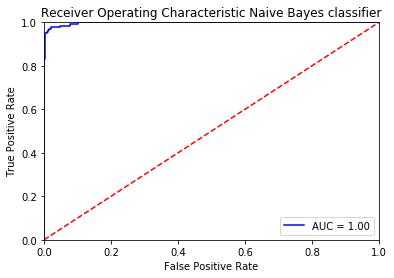

In [86]:
# polt the AUC
#=====================================================
plt.title('Receiver Operating Characteristic Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#=====================================================

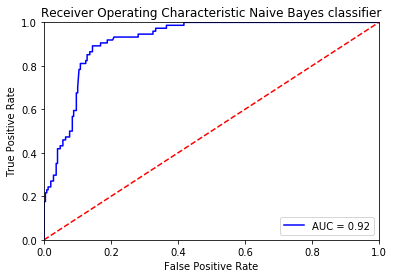

In [91]:
# calculate the fpr and tpr for all thresholds of the classification
#=====================================================
probs = mnb.predict_proba(x_testCV)[:,1]

#=====================================================
metrics.roc_auc_score(actual, probs) #the area under the curve (AUC)
#=====================================================

fpr, tpr, threshold = metrics.roc_curve(actual, probs)
roc_auc = metrics.auc(fpr, tpr)
#=====================================================
# polt the AUC
#=====================================================
plt.title('Receiver Operating Characteristic Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#=====================================================

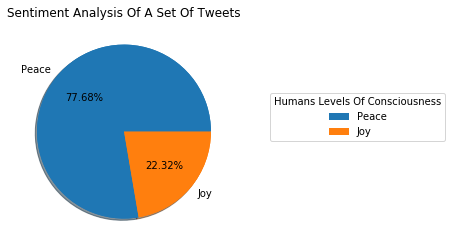

In [67]:
# change values to numeric

data_df.loc[data_df["sentiment"]==0,"sentiment"]='Peace'
data_df.loc[data_df["sentiment"]==1,"sentiment"]='Joy'
tweets_by_sentiment = data_df['sentiment'].value_counts()
# visualize the results 
fig, ax = plt.subplots()

tweets_by_sentiment.plot(kind='pie')
plt.legend (["Peace","Joy"],title="Humans Levels Of Consciousness",
          loc="best",bbox_to_anchor=(1, 0.5, 1, 0.20))
plt.xlabel("")
plt.ylabel("")

ax.pie([len(data_df[data_df.sentiment=='Peace']),len(data_df[data_df.sentiment=='Joy'])],autopct='%1.2f%%',
        shadow=True, startangle=0)
ax.set_title("Sentiment Analysis Of A Set Of Tweets")
plt.show()

In [67]:
                     #=====================================
                     #==     End of Data Visulization    ==
                    #======================================

In [68]:
                      #======================================
                     #==  _-_-_   End of the Project_-_-_  ==
                    #========================================
            